In [553]:
# Import all relevant libraries for the following analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime
%matplotlib inline

## A) Business understanding
In this project I will try to answer the following questions:

1. Do the average prices per stay vary between weekdays and weekend?
2. Which month has the highest average price per night?
3. Which neighborhood has the highest average price per stay?

## B) Data understanding
This section will deal with the gathering and analyzing of the data.

### Data gathering

In [554]:
# Reading in all the data
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')
calendar = pd.read_csv('calendar.csv')

### Data analysis

In [555]:
# Analyzing the various data sets to understand the data and maybe discover issues.

listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [556]:
listings.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

In [557]:
# We have to set "max columns" in order to be able to have a look at all the information
pd.set_option("display.max_columns", 100)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 100)

In [558]:
listings.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

In [559]:
listings.shape

(3818, 92)

In [560]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [561]:
reviews.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [562]:
reviews.shape

(84849, 6)

In [563]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [564]:
calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [565]:
# The data for price has the datatype object, which needs to be addressed in the next section in order to do the proposed analysis.
# We need to address the issue that our dates are not in a datetype.

In [566]:
calendar.shape

(1393570, 4)

In [567]:
# We have to check whether the number of listing IDs matches the information from the listings data.
calendar.shape[0]/365

3818.0

## C) Data preparation

### For my business questions I have to work with the listings and calendar data.

#### C.1. I will start with preaparing the calendar data

In [568]:
# Are there any missing values in the the columns or rows of the loaded data?
print(calendar.isnull().any())
print()
print(listings.isnull().any())
print()
print(reviews.isnull().any())

listing_id    False
date          False
available     False
price          True
dtype: bool

id                                  False
listing_url                         False
scrape_id                           False
last_scraped                        False
name                                False
summary                              True
space                                True
description                         False
experiences_offered                 False
neighborhood_overview                True
notes                                True
transit                              True
thumbnail_url                        True
medium_url                           True
picture_url                         False
xl_picture_url                       True
host_id                             False
host_url                            False
host_name                            True
host_since                           True
host_location                        True
host_about               

In [569]:
# Convert price into float and correct some other issues, e. g. delete the "$".
calendar['price'] = calendar['price'].str.replace(',', '')
calendar['price'] = calendar['price'].str.replace('$', '')
calendar['price'] = calendar['price'].astype(float)
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [570]:
# Let's convert the date column to a datetype
calendar['date'] = pd.to_datetime(calendar['date'])

In [571]:
calendar.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

#### C.2. I will proceed with the listings data

In [572]:
# Let's create a shorter version of our data that only contains the ID and the Neighborhood.
list = listings[['id','neighbourhood_group_cleansed']]
list.head()

,id,neighbourhood_group_cleansed
0,241032,Queen Anne
1,953595,Queen Anne
2,3308979,Queen Anne
3,7421966,Queen Anne
4,278830,Queen Anne


In [573]:
# Let's have a look at the total number of Listings per Neighborhood.
list['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

In [574]:
# In order to make to following analysis and subsequently visualizations easier / more readable I'l like to change the following
# 1. Rename the columns "id" and "neighbourhood_group_cleansed"
# 2. Rename the two long neighborhoods names "other neighborhoods to other" and "University District to UD"

In [575]:
# 1. Rename columns
list = list.rename(index=str, columns={"id": "listing_id", "neighbourhood_group_cleansed":"neighborhood"})
list.head()

,listing_id,neighborhood
0,241032,Queen Anne
1,953595,Queen Anne
2,3308979,Queen Anne
3,7421966,Queen Anne
4,278830,Queen Anne


In [576]:
# 2. Rename long neighborhood names
list['neighborhood'] = list['neighborhood'].replace('Other neighborhoods','Other')
list[list['neighborhood'] == 'Other'].head()

,listing_id,neighborhood
280,314180,Other
281,8670079,Other
282,4868135,Other
283,5336585,Other
284,1427103,Other


#### C.3. I will now combine the two datasets and finalize minor changes

In [577]:
# Next we need to merge the list and calendar dfs
final_df = pd.merge(calendar, list, on=['listing_id', 'listing_id'])
final_df.dtypes

listing_id               int64
date            datetime64[ns]
available               object
price                  float64
neighborhood            object
dtype: object

In [578]:
# In order to make the neighborhood variable more workable I'd like to change it to be a categorical variable
final_df['neighborhood'] = final_df['neighborhood'].astype('category')
final_df.dtypes

listing_id               int64
date            datetime64[ns]
available               object
price                  float64
neighborhood          category
dtype: object

In [579]:
# Finally I'm creating a custom list for months and days in order to make upcoming analysis and visualizations more readable
month_list=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
week_list=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

#### C.4. Exploratory data analysis
After wrangling, cleaning and preprocessing I will, in this section, look into the business questions asked.

#### C.4.1. Do the average prices per stay vary between weekdays and weekend?

In [580]:
# Let's have a look at the average prices paid per day - including a renaming of he numbered days with values from my week_list
week = final_df.groupby(final_df['date'].dt.strftime('%w'))['price'].mean()
week = pd.DataFrame(week).reset_index()
week['date'] = week['date'].replace(['0','1','2','3','4','5','6'], week_list)
week

,date,price
0,Mon,136.459941
1,Tue,135.676414
2,Wed,135.408764
3,Thu,135.447880
4,Fri,136.476032
5,Sat,143.036294
6,Sun,143.202136


#### C.4.2. Which month has the highest average price per night?

In [581]:
# Let's have a look at the average prices by month
month_avg_price_per_night = final_df.groupby(final_df['date'].dt.strftime('%m'))['price'].mean()
month_avg_price_per_night = pd.DataFrame(avg_price_per_night).reset_index()
month_avg_price_per_night['date'] = avg_price_per_night.replace(['01','02','03','04','05','06','07','08','09','10','11','12'], month_list)
month_avg_price_per_night

,index,date,price
0,0,Jan,122.912176
1,1,Feb,124.293927
2,2,Mar,128.644488
3,3,Apr,135.097005
4,4,May,139.538183
5,5,Jun,147.473137
6,6,Jul,152.094150
7,7,Aug,150.656594
8,8,Sep,143.255949
9,9,Oct,137.031939


#### C.4.3. Which neighborhood has the highest average price per stay?

In [582]:
# Let's have a look at he average prices per neighborhood
final_df.groupby('neighborhood')['price'].mean().sort_values(ascending=False)

neighborhood
Magnolia               198.694341
Downtown               187.343042
Queen Anne             176.117882
Cascade                154.033178
West Seattle           148.155804
Central Area           134.883729
Capitol Hill           134.671895
Ballard                125.905980
Other                  125.622015
Interbay               118.421037
Seward Park            111.110338
University District    104.709937
Beacon Hill            100.668781
Rainier Valley         100.104924
Lake City               94.518589
Northgate               93.455532
Delridge                90.926944
Name: price, dtype: float64

In [583]:
# Let's create something that we can use later when i comes to visualizations.
neighborhood_avg_price_per_month = round(final_df.groupby('neighborhood')['price'].mean(),2)
neighborhood_avg_price_per_month = pd.DataFrame(neighborhood_avg_price_per_month).reset_index()
neighborhood_avg_price_per_month

,neighborhood,price
0,Ballard,125.91
1,Beacon Hill,100.67
2,Capitol Hill,134.67
3,Cascade,154.03
4,Central Area,134.88
5,Delridge,90.93
6,Downtown,187.34
7,Interbay,118.42
8,Lake City,94.52
9,Magnolia,198.69


## D) Data modeling

No modeling done so far.

## E) Data visualization

#### E.1. Barplot to visualize the business question: C.4.1. Do the average prices per stay vary between weekdays and weekend?

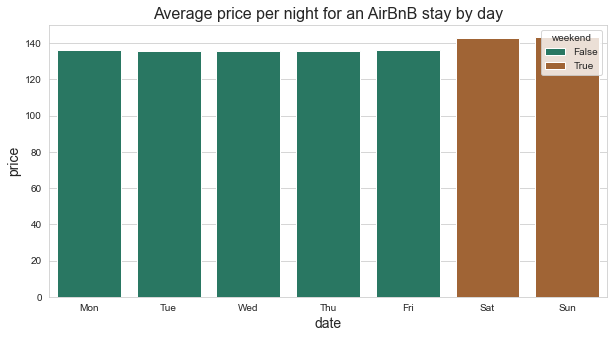

In [584]:
# First I create the variable for the weekend, to vary the color in the visualization
week["weekend"] = week["date"].isin(["Sat", "Sun"])

# Next, I set the plot size. I wanted to make it double as wide as high.
f, ax = plt.subplots(figsize=(10,5))

# Next, set the parameter for the background of the barplot.
sns.set_style("whitegrid")

# Customize the titles and labels.
plt.title("Average price per night for an AirBnB stay by day",fontsize=16)
plt.xlabel("Days",fontsize=14)
plt.ylabel("Price ($)",fontsize=14)
ax.legend('')

# Finally I set y-axis to 150, in order to make all data visible.
plt.ylim(0,150);

# Now, let's plot the data.
sns.barplot(x="date",y="price",hue='weekend',data=week,dodge=False,
            palette=current_palette[2:4],saturation=0.5)

#### E.2. Barplot to visualize the business question: C.4.2. Which month has the highest average price per night?

In [585]:
def create_plot(dataframe,x,y,ylim,title,xlabel,ylabel,color,meanline="price"):
    
    # First I set the plot size. I wanted to make it double as wide as high.
    f, ax = plt.subplots(figsize=(10,5))
    
     # Next, set the parameter for the background of the barplot.
    sns.set_style("whitegrid")
    
    # Next, let's plot data 
    sns.barplot(x,y,data=dataframe,color=color,saturation=.5,)
    
    # Next, we need to add titles and labels
    plt.title(title,fontsize=16)
    plt.xlabel(xlabel,fontsize=14)
    plt.ylabel(ylabel,fontsize=14)
    plt.ylim(0,ylim)
    
    # Next, I set y-axis to 150, in order to make all data visible.
    plt.ylim(0,225);
    
    # Finally let's add a mean line for year; an interesting way to help put monthly data in relation to each other.
    if meanline == 'price': 
        plt.axhline(calendar[meanline].mean(),color='steelblue',label='Avg for Year')
    else:
        plt.axhline(calendar[meanline].mean()*100,color='b',label='Avg for Year')
    plt.legend();

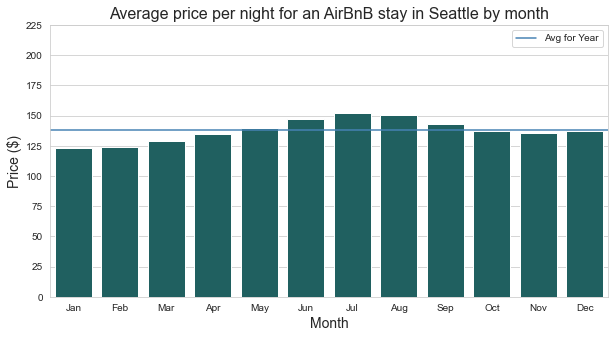

In [586]:
# Barplot visualization of monthly average price per night
[create_plot(month_avg_price_per_night,"date","price",120,
             title="Average price per night for an AirBnB stay in Seattle by month",
             xlabel="Month",
             ylabel="Price ($)",
             color="teal",
             meanline = "price")];

#### E.3. Barplot to visualize the business question: C.4.3. Which neighborhood has the highest average price per stay?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

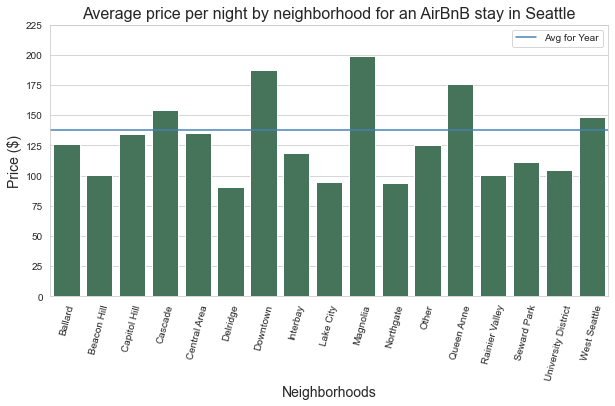

In [587]:
# Bar plot visualization of neighbourhood average price

[create_plot(neighborhood_avg_price_per_month,"neighborhood","price",160,
             title="Average price per night by neighborhood for an AirBnB stay in Seattle",
             xlabel="Neighborhoods",
             ylabel="Price ($)",
             color="seagreen",
             meanline="price")]; 

plt.xticks(rotation=75)

## F) Results deployment

No deployment done so far.